## Split Dataset

In [45]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data/train_encoded.csv')
data.head(5)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,1.0,0,0,0,1,0,0,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,1.0,0,0,0,0,0,1,0,0,0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,0.0,1,0,0,1,0,0,1,0,0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,1.0,0,0,0,0,0,1,0,0,0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,1.0,1,0,0,0,0,1,1,0,0


In [46]:
data.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'education_level', 'income_level', 'smoking_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes', 'gender_Male',
       'gender_Other', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Other', 'ethnicity_White', 'employment_status_Retired',
       'employment_status_Student', 'employment_status_Unemployed'],
      dtype='object')

In [47]:
X = data.drop(columns=['diagnosed_diabetes', 'id'])
Y = data['diagnosed_diabetes']

In [48]:
X.shape

(700000, 30)

In [49]:
Y.shape

(700000,)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [51]:
X_train.shape

(560000, 30)

In [52]:
X_val.shape

(140000, 30)

In [53]:
y_train.shape

(560000,)

In [54]:
y_val.shape

(140000,)

## Scaling

In [55]:
data.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'education_level', 'income_level', 'smoking_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes', 'gender_Male',
       'gender_Other', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Other', 'ethnicity_White', 'employment_status_Retired',
       'employment_status_Student', 'employment_status_Unemployed'],
      dtype='object')

In [56]:
data['triglycerides'].unique()

array([102, 124, 108, 123,  95, 137, 132,  97, 153, 117, 164, 107, 175,
       173, 160, 122, 131, 135, 147, 157, 112, 136, 125, 119, 155, 100,
       172, 163, 152, 111, 145, 141, 182, 151, 128,  76, 113,  68, 165,
       142, 129,  63, 115,  78, 144,  91, 159, 148, 130, 101, 114, 146,
        92, 104,  85, 103,  88,  90, 143,  73, 177, 116,  98,  96,  89,
        84, 106, 134, 118, 109,  94,  93, 105, 127, 133,  64, 176, 110,
        74,  56, 150, 168, 154,  86,  99, 126, 166, 139,  82, 138, 210,
        66,  75, 193, 140, 121, 120, 180, 161,  67,  87, 158,  79,  83,
        72, 174,  38,  71, 156, 205, 226, 184, 185, 188, 171,  57, 189,
        70,  65, 162,  53, 178,  80, 169, 149,  77,  81, 183,  62, 197,
        52, 192,  59,  46,  43, 179, 187, 181, 219,  49,  48,  58, 167,
       170, 231, 201, 220, 194,  60, 211, 203,  50,  55, 223,  44, 186,
       196,  42, 207, 209,  69,  61,  51, 191, 199, 216, 190, 228,  47,
       229, 195, 202, 230,  45,  39,  34, 206,  54, 221,  41, 21

In [57]:
continuous_cols = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi',
    'waist_to_hip_ratio',
    'systolic_bp',
    'diastolic_bp',
    'heart_rate',
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides'
]


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [59]:
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_val[continuous_cols] = scaler.transform(X_val[continuous_cols])

In [60]:
X_train.shape

(560000, 30)

In [61]:
y_train.value_counts()


diagnosed_diabetes
1.0    348936
0.0    211064
Name: count, dtype: int64

In [62]:
y_train.head(5)

363147    1.0
29625     1.0
9585      0.0
608621    1.0
667290    0.0
Name: diagnosed_diabetes, dtype: float64

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [64]:
model = Sequential()

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


# Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [67]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')


[]

In [68]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.6567 - loss: 0.6114 - val_accuracy: 0.6618 - val_loss: 0.6030
Epoch 2/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.6619 - loss: 0.6067 - val_accuracy: 0.6620 - val_loss: 0.6035
Epoch 3/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.6623 - loss: 0.6061 - val_accuracy: 0.6618 - val_loss: 0.6028
Epoch 4/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.6618 - loss: 0.6059 - val_accuracy: 0.6612 - val_loss: 0.6055
Epoch 5/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.6622 - loss: 0.6057 - val_accuracy: 0.6632 - val_loss: 0.6024
Epoch 6/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.6631 - loss: 0.6055 - val_accuracy: 0.6627 - val_loss: 0.6024
Epoch 7/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.6625 - loss: 0.6055 - val_accuracy: 0.6630 - val_loss: 0.6018
Epoch 8/50
17500/17500 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 

## Evaluation

In [ ]:
y_pred_prob = model.predict(X_val)

4375/4375 ━━━━━━━━━━━━━━━━━━━━ 4s 862us/step


In [70]:
y_pred_prob

array([0.4855666 , 0.6449746 , 0.38049328, ..., 0.6987364 , 0.7275371 ,
       0.47007248], dtype=float32)

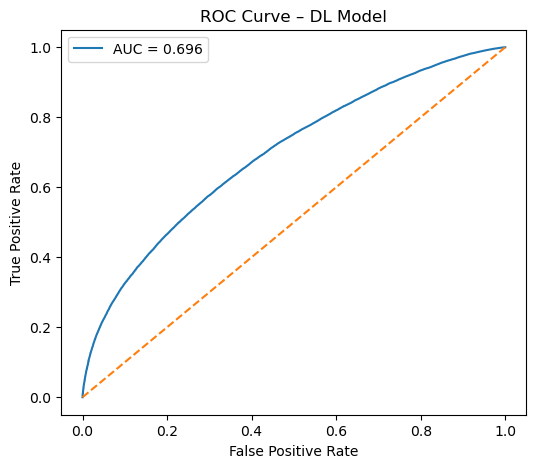

In [73]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – DL Model")
plt.legend()
plt.show()


In [79]:
import joblib
from tensorflow.keras.models import load_model

joblib.dump(scaler, "./models/model_accu_69.pkl")
model.save("models/diabetes_dl_model.keras")
